## python 社群
- Python Taiwan : https://www.facebook.com/groups/pythontw

- PyHug : https://www.meetup.com/pythonhug

- Taipei.py : https://www.meetup.com/Taipei-py

- Tainan.py :https://www.meetup.com/Tainan-py-Python-Tainan-User-Group

- Kaohsiung.py :https://www.meetup.com/Kaohsiung-Python-Meetup

- Taichung.py :https://www.facebook.com/groups/780250978715991

- Hualien.Py :https://www.meetup.com/Hualien-Py

- Nantou.py : https://www.facebook.com/profile.php?id=100070205115112

- PyLadies Taiwan :https://tw.pyladies.com

- Astrohackers in Taiwan : https://www.facebook.com/groups/astrohackers.tw.py

## 天文相關資源
- 天聞的資料科學:https://github.com/YihaoSu/data-science-with-astronomy-news
- 獵星者旅店:https://chat.openai.com/g/g-LGVdyZVRU-tian-wen-xue-python-rpg-lie-xing-zhe-lu-dian

## 套件安裝
- Astropy	提供天文研究常用的基本工具，例如座標系統、時間系統、物理單位的轉換以及檔案讀寫操作。
- Astroquery	用來查詢和下載各種天文資料庫的資料。
- SunPy	提供太陽觀測資料下載、分析與視覺化的工具。
- Lightkurve	用於分析 Kepler 和 TESS 太空望遠鏡的光變曲線資料，以便尋找和研究系外行星。
- photutils	用於天文影像的光度學分析，例如測量星體的光度。
- specutils	用於分析星體光譜，包括讀取、擬合、視覺化光譜資料。
- AstroML	提供機器學習和資料探勘的工具來分析天文資料。

In [1]:
!pip install astropy
!pip install astroquery

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ------- -------------------------------- 1.0/5.3 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 5.3/5.3 MB 24.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/994.8 kB ? eta -:--:--
   --------------------------------------- 994.8/994.8 kB 48.8 MB/s eta 0:00:00


In [ ]:
from astropy import units as u
from astroquery. simbad import Simbad
# Simbad 是一個大型的天文數據庫，提供了天體的坐標、光度、類型等詳細資料

result = Simbad.query_object("M31")
result

# 也可以透過他的API查詢：https://simbad.cds.unistra.fr/simbad/sim-fbasic

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
M 31,00 42 44.330,+41 16 07.50,7,7,--,--,0,C,I,2006AJ....131.1163S,1


## 使用python觀測太陽觀測資料

In [21]:
!pip install sunpy[all]


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/967.6 kB ? eta -:--:--
   ---------------------------------------- 967.6/967.6 kB 8.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --------------- ------------------------ 1.0/2.7 MB 25.4 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.7 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   -------- ------------------------------- 8.7/38.8 MB 41.1 MB/s eta 0:00:01
   ----------------- ---------------------- 16.5/38.8 MB 38.5 MB/s eta 0:00:01
   ------------------------ --------------- 23.9/38.8 MB 37.7 MB/s eta 0:00:01
   --------------------------------- ------ 32.5/38.8 MB 38.9 MB/

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


### 將太陽資料可視化

In [37]:
# 太陽影像圖
from sunpy.net import Fido, attrs as a
import astropy.units as u
from sunpy.map import Map

# 設定時間範圍（2024/11/05 0:00 到 2024/11/05 22:00）
time = a.Time('2024/11/05 00:00', '2024/11/05 22:00')

# 設定觀測儀器和波長（例如 AIA 171 Å）
instrument = a.Instrument('AIA')
wavelength = a.Wavelength(171 * u.angstrom)

# 搜尋並下載符合條件的資料
search_result = Fido.search(time, instrument, wavelength)
downloaded_files = Fido.fetch(search_result)



Files Downloaded:   0%|          | 0/291 [00:00<?, ?file/s]

AIA20241105_142700_0171.fits:   0%|          | 0.00/1.28M [00:00<?, ?B/s]

AIA20241105_143000_0171.fits:   0%|          | 0.00/1.28M [00:00<?, ?B/s]

資料長度 291
觀測日期: 2024-11-05T00:00:09.350
曝光時間: 1.999574 s
影像資料 (矩陣形式):
[[-0.125  -0.1875 -0.375  ... -0.1875  0.      0.    ]
 [-0.25   -0.25    0.125  ... -0.375   0.      0.    ]
 [ 0.1875 -0.25    0.3125 ... -0.1875  0.      0.    ]
 ...
 [-0.3125  0.125   0.375  ...  0.1875  0.      0.    ]
 [-0.25   -0.25   -0.25   ...  0.1875  0.      0.    ]
 [-0.1875 -0.3125 -0.1875 ...  0.125   0.      0.    ]]


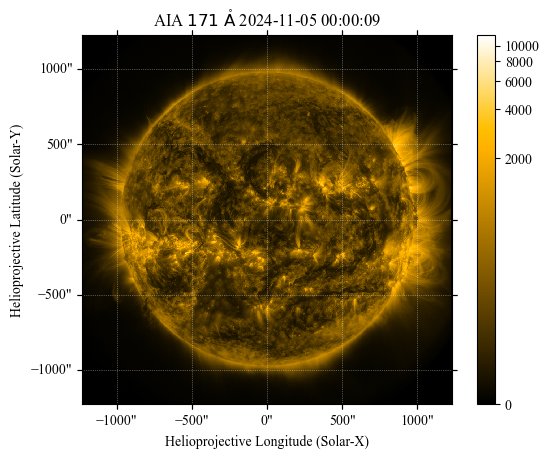

In [39]:
import matplotlib.pyplot as plt

# 使用 Map 物件來顯示其中一張影像
print("資料長度", len(downloaded_files))
image_file = downloaded_files[0]  # 使用第一個下載的檔案作為範例
map_obj = Map(image_file)

# 顯示觀測日期和影像資料
print("觀測日期:", map_obj.date)
print("曝光時間:", map_obj.exposure_time)
print("影像資料 (矩陣形式):")
print(map_obj.data)

# 使用 peek() 方法快速視覺化影像
map_obj.peek()
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()

In [ ]:
from sunpy.net import Fido, attrs as a
from sunpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
from sunpy.time import TimeRange

# 設定日期（可以更改為你想要的日期）
date = '2023-05-21'

# 使用 Fido 搜尋符合條件的 GOES 衛星 XRS 資料
search_result = Fido.search(a.Time(date + ' 00:00', date + ' 23:59'), a.Instrument('AIA'))

# 檢查是否有符合的結果
if len(search_result[0]) > 0:
    # 下載資料
    downloaded_files = Fido.fetch(search_result)
    print("下載的檔案:", downloaded_files)

    # 合併多個下載檔案成一個 TimeSeries 物件
    ts_obj = TimeSeries(downloaded_files, concatenate=True, source='XRS')

    # 設定白天的時間範圍 (06:00 到 18:00)
    day_range = TimeRange(date + ' 06:00', date + ' 18:00')
    ts_obj_day = ts_obj.truncate(day_range)

    # 設定晚上的時間範圍 (18:00 到 23:59)
    night_range = TimeRange(date + ' 18:00', date + ' 23:59')
    ts_obj_night = ts_obj.truncate(night_range)

    # 創建一個 1 行 2 列的圖形，分別顯示白天和晚上的時間序列
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # 繪製白天的時間序列
    ts_obj_day.plot(axes=ax1)
    ax1.set_title('GOES XRS Time Series (Day)')
    lines1 = ax1.get_lines()
    lines1[0].set_color('b')  # 設定 xrsa 線條顏色為藍色
    lines1[0].set_label('xrsa (0.5-4.0 Angstrom)')
    lines1[1].set_color('r')  # 設定 xrsb 線條顏色為紅色
    lines1[1].set_label('xrsb (1.0-8.0 Angstrom)')
    ax1.legend()

    # 繪製晚上的時間序列
    ts_obj_night.plot(axes=ax2)
    ax2.set_title('GOES XRS Time Series (Night)')
    lines2 = ax2.get_lines()
    lines2[0].set_color('g')  # 設定截取後 xrsa 線條顏色為綠色
    lines2[0].set_label('xrsa (0.5-4.0 Angstrom)')
    lines2[1].set_color('m')  # 設定截取後 xrsb 線條顏色為洋紅色
    lines2[1].set_label('xrsb (1.0-8.0 Angstrom)')
    ax2.legend()

    # 顯示圖表
    plt.show()
else:
    print("未找到符合指定日期的 GOES 衛星資料。")


Files Downloaded:   0%|          | 0/1319 [00:00<?, ?file/s]

aia.lev1.4500A_2023_05_21T00_00_05.68Z.image_lev1.fits:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

### 將一段時間的太陽去做成GIF

In [1]:
from sunpy.net import Fido, attrs as a
import astropy.units as u
from sunpy.map import Map
import matplotlib.pyplot as plt
import imageio  # 用於生成 GIF
import os

# 設定時間範圍（2024/11/05 0:00 到 2024/11/05 22:00）
time = a.Time('2024/11/05 00:00', '2024/11/05 22:00')

# 設定觀測儀器和波長（例如 AIA 171 Å）
instrument = a.Instrument('AIA')
wavelength = a.Wavelength(171 * u.angstrom)

# 搜尋並下載符合條件的資料
search_result = Fido.search(time, instrument, wavelength)
downloaded_files = Fido.fetch(search_result)

# 確認是否有下載的檔案
if len(downloaded_files) > 1:
    # 創建一個暫時的文件夾來存放影像
    temp_folder = "temp_images"
    os.makedirs(temp_folder, exist_ok=True)

    # 循環處理每個影像並儲存為 PNG
    image_files = []
    for i, file in enumerate(downloaded_files):
        # 將每一張 FITS 影像讀取為 Map 物件
        map_obj = Map(file)

        # 設定圖片保存路徑
        image_path = os.path.join(temp_folder, f"image_{i}.png")
        map_obj.plot()  # 繪製影像
        plt.savefig(image_path)  # 保存影像為 PNG 格式
        plt.close()  # 關閉當前繪圖視窗
        image_files.append(image_path)  # 儲存圖片路徑

    # 使用 imageio 將所有 PNG 影像整合為 GIF
    with imageio.get_writer("solar_animation.gif", mode="I", duration=0.2) as writer:
        for image_path in image_files:
            image = imageio.imread(image_path)
            writer.append_data(image)

    # 清理暫時文件夾中的影像
    for image_path in image_files:
        os.remove(image_path)
    os.rmdir(temp_folder)

    print("GIF 影像已保存為 solar_animation.gif")
else:
    print("未找到符合條件的影像資料。")


Files Downloaded:   0%|          | 0/297 [00:00<?, ?file/s]

AIA20241105_143300_0171.fits:   0%|          | 0.00/1.28M [00:00<?, ?B/s]

AIA20241105_143900_0171.fits:   0%|          | 0.00/1.28M [00:00<?, ?B/s]

AIA20241105_144200_0171.fits:   0%|          | 0.00/1.28M [00:00<?, ?B/s]

AIA20241105_143600_0171.fits:   0%|          | 0.00/1.28M [00:00<?, ?B/s]

AIA20241105_144500_0171.fits:   0%|          | 0.00/1.28M [00:00<?, ?B/s]

AIA20241105_144800_0171.fits:   0%|          | 0.00/1.28M [00:00<?, ?B/s]

C:\Users\33313\AppData\Local\Temp\ipykernel_22940\2342815414.py:41: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


GIF 影像已保存為 solar_animation.gif
